#### Week 19 - Homework

###### Angela Spencer - February 9, 2022

##### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Train-test-split
scaling - StandardScaler, Normalizer, MinMaxScaler, AbsScaler
oversampling/undersampling
SMOTE-ENN for imbalanced classification
PCA for dimensionality reduction
GridSearchCV / RandomizedSearchCV

Logistic Regression
Linear Regression
K Nearest Neighbors
Support Vector Machines
Decision Trees: Decision Tree, RandomForest, XGBoost 
Neural Networks / Deep Learning: Keras/TensorFlow/Pytorch

##### 2. Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.
 

KMeans Clustering
Hierarchical Clustering
t-SNE
NMF (non-negative factorization)

##### 3. Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import Normalizer

In [3]:
purchases = pd.read_csv('../Datasets/ecommerce.csv', encoding = 'unicode_escape')
print(purchases.shape)
purchases.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#view data types
purchases.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#view null values
purchases.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Drop Rows with problematic values

In [6]:
# Price Column
# Drop rows with 0 or negative values
purchases = purchases[purchases['UnitPrice']>0]
purchases.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
539387,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
539388,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
539389,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
539390,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
# Country column
# Drop 'Unspecified' and 'European Community' rows
purchases = purchases[purchases['Country'].str.contains('Unspecified|European Community')==False]
purchases['Country'].value_counts()

United Kingdom          492979
Germany                   9493
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
RSA                         57
Lebanon                     45
Lithuania                   35
Brazil  

In [8]:
# InvoiceNo column
# Drop all credit and adjusted invoices
purchases = purchases[purchases['InvoiceNo'].str.contains('C|A')==False]
purchases.reset_index()
purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Convert InvoiceDate to datetime and extract Month

In [9]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])

In [10]:
purchases['InvoiceMonth'] = pd.to_datetime(purchases['InvoiceDate']).dt.month
purchases.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [11]:
# StockCode column
# drop rows for postage amounts, manually entered invoices, and Amazon Fees
purchases = purchases[purchases['StockCode'].str.contains('DOT|AMAZONFEE')==False]
purchases = purchases[purchases['StockCode']!= 'M']
purchases 

purchases[purchases['StockCode'].str.contains('DOT')]
purchases[purchases['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth


###### Handling Null Values

In [12]:
## Convert Null Customers IDs to corresponding Invoice ID

#df of purchases where customer ID is null
null_cust = purchases[purchases['CustomerID'].isnull()]

print('Number of rows with null CustomerID: {:}'.format(null_cust.shape[0]))

#group df of null customers by Invoice Numbers
null_cust_invoice_grouped = null_cust.groupby('InvoiceNo')

#view unique Invoices with null customer IDs
#produces an array
null_cust_unique_invoices = np.unique(null_cust['InvoiceNo'])

#number of unique invoices that have no customer ID
print('Number of unique InvoiceNos with null CustomerID: {:}'.format(null_cust_unique_invoices.shape[0]))

Number of rows with null CustomerID: 131288
Number of unique InvoiceNos with null CustomerID: 1392


In [13]:
# replace null CustomerID with invoice number
null_cust['CustomerID'] = [x for x in null_cust['InvoiceNo']]
null_cust

C:\Users\aspen\AppData\Local\Temp/ipykernel_6448/709420673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cust['CustomerID'] = [x for x in null_cust['InvoiceNo']]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,536544,United Kingdom,12
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,536544,United Kingdom,12
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,536544,United Kingdom,12
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,536544,United Kingdom,12
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,536544,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,581498,United Kingdom,12
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,581498,United Kingdom,12
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,581498,United Kingdom,12
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,581498,United Kingdom,12


In [14]:
#drop all rows with null values in CustomerId column
purchases = purchases[purchases['CustomerID'].notnull()]

#add modified customer IDs to original df
purchases = purchases.append(null_cust)

In [15]:
#reset index after dropping rows
purchases.reset_index()
purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,581498,United Kingdom,12
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,581498,United Kingdom,12
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,581498,United Kingdom,12
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,581498,United Kingdom,12


In [16]:
#check for remaining null values
purchases.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
InvoiceMonth    0
dtype: int64

##### Engineer a Total Item Price column

In [18]:
purchases['TotalPrice'] = purchases['Quantity']*purchases['UnitPrice']
purchases.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth',
       'TotalInvoiceAmount', 'TotalPrice'],
      dtype='object')

##### Create a df of aggregated info for each customer

In [17]:
# create total invoices column
purchases_mod = purchases
purchases_mod['NoInvoices'] = 1

#factorize Country to include in df
purchases_mod['Country_enc'], Country_uniques = pd.factorize(purchases_mod['Country'])
purchases_mod

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,NoInvoices,Country_enc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,581498,United Kingdom,12,13.16,1,0
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,581498,United Kingdom,12,20.65,1,0
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,581498,United Kingdom,12,16.52,1,0
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,581498,United Kingdom,12,4.96,1,0


In [18]:
# perform aggregate calculations on columns
cust_groupby = purchases_mod.groupby(['CustomerID']).agg({'Quantity':np.sum,
                                                         'UnitPrice':np.mean, 
                                                         'InvoiceMonth': np.max,
                                                         'TotalPrice': np.sum,
                                                          'NoInvoices': np.sum,
                                                          'Country_enc': np.max})
cust_groupby

,Quantity,UnitPrice,InvoiceMonth,TotalPrice,NoInvoices,Country_enc
CustomerID,,,,,,
12346.0,74215,1.040000,1,77183.60,1,0
12347.0,2458,2.644011,12,4310.00,182,15
12348.0,2341,5.764839,12,1797.24,31,20
12349.0,631,8.289041,11,1757.55,73,11
12350.0,197,3.841176,2,334.40,17,5
...,...,...,...,...,...,...
581435,2,1.675000,12,3.35,2,0
581439,1747,4.320946,12,5699.00,634,0
581492,2010,4.175904,12,6756.06,730,0


In [19]:
# rename columns
rename = {'Quantity': 'TotalItems', 
          'UnitPrice': 'AverageItemPrice',
         'InvoiceMonth': 'LastPurchaseMonth',
         'TotalPrice': 'TotalPurchases', 
         'NoInvoice': 'TotalInvoiceNo'}
cust_groupby.rename(columns=rename, inplace=True)

#move CustomerID out of index
cust_groupby.reset_index(inplace=True)
cust_groupby

,CustomerID,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalPurchases,NoInvoices,Country_enc
0,12346.0,74215,1.040000,1,77183.60,1,0
1,12347.0,2458,2.644011,12,4310.00,182,15
2,12348.0,2341,5.764839,12,1797.24,31,20
3,12349.0,631,8.289041,11,1757.55,73,11
4,12350.0,197,3.841176,2,334.40,17,5
...,...,...,...,...,...,...,...
5717,581435,2,1.675000,12,3.35,2,0
5718,581439,1747,4.320946,12,5699.00,634,0
5719,581492,2010,4.175904,12,6756.06,730,0
5720,581497,654,6.269661,12,3217.20,59,0


In [20]:
cust_groupby.columns

Index(['CustomerID', 'TotalItems', 'AverageItemPrice', 'LastPurchaseMonth',
       'TotalPurchases', 'NoInvoices', 'Country_enc'],
      dtype='object')

###### Keep a df for labeling, before encoding and normalization

In [21]:
purchases_labels = purchases
cust_groupby_labels = cust_groupby

##### Convert datatypes and Categorical encoding - purchases df

In [22]:
#Convert Invoice column to numeric
purchases['InvoiceNo'] = pd.to_numeric(purchases['InvoiceNo'])

In [23]:
#encode StockCode, Country, and CustomerID columns using pd.factorize()
purchases['StockCode_enc'], StockCode_uniques = pd.factorize(purchases['StockCode'])
purchases['Country_enc'], Country_uniques = pd.factorize(purchases['Country'])
purchases['CustomerID_enc'], CustomerID_uniques = pd.factorize(purchases['CustomerID'])

In [24]:
purchases.dtypes

InvoiceNo                  int64
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID                object
Country                   object
InvoiceMonth               int64
TotalPrice               float64
NoInvoices                 int64
Country_enc                int64
StockCode_enc              int64
CustomerID_enc             int64
dtype: object

In [25]:
#drop redundant columns
purchases.drop(['StockCode', 'Description', 'InvoiceDate',
                'CustomerID', 'Country'], axis=1, inplace=True)
purchases

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,TotalPrice,NoInvoices,Country_enc,StockCode_enc,CustomerID_enc
0,536365,6,2.55,12,15.30,1,0,0,0
1,536365,6,3.39,12,20.34,1,0,1,0
2,536365,8,2.75,12,22.00,1,0,2,0
3,536365,6,3.39,12,20.34,1,0,3,0
4,536365,6,3.39,12,20.34,1,0,4,0
...,...,...,...,...,...,...,...,...,...
541535,581498,4,3.29,12,13.16,1,0,3703,5721
541536,581498,5,4.13,12,20.65,1,0,138,5721
541537,581498,4,4.13,12,16.52,1,0,60,5721
541538,581498,1,4.96,12,4.96,1,0,232,5721


##### Convert datatypes and Categorical encoding - cust_groupby df

In [26]:
#encode CustomerID column using pd.factorize()
cust_groupby['CustomerID_enc'], CustomerID_uniques = pd.factorize(cust_groupby['CustomerID'])

In [27]:
# drop redundant column after encoding
cust_groupby.drop('CustomerID', axis=1, inplace=True)
cust_groupby

,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalPurchases,NoInvoices,Country_enc,CustomerID_enc
0,74215,1.040000,1,77183.60,1,0,0
1,2458,2.644011,12,4310.00,182,15,1
2,2341,5.764839,12,1797.24,31,20,2
3,631,8.289041,11,1757.55,73,11,3
4,197,3.841176,2,334.40,17,5,4
...,...,...,...,...,...,...,...
5717,2,1.675000,12,3.35,2,0,5717
5718,1747,4.320946,12,5699.00,634,0,5718
5719,2010,4.175904,12,6756.06,730,0,5719
5720,654,6.269661,12,3217.20,59,0,5720


##### Normalize purchases df

In [28]:
# view stats, variance, standard deviation, mean
purchases.describe()

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,TotalPrice,NoInvoices,Country_enc,StockCode_enc,CustomerID_enc
count,528568.000000,528568.000000,528568.000000,528568.000000,528568.000000,528568.0,528568.000000,528568.000000,528568.000000
mean,559986.745622,10.550476,3.338787,7.562592,19.583956,1.0,0.577123,1286.462624,2376.778070
std,13435.995664,155.715263,12.195452,3.509583,268.655080,0.0,2.648000,1121.867162,1894.795612
min,536365.000000,1.000000,0.001000,1.000000,0.001000,1.0,0.000000,0.000000,0.000000
25%,547906.000000,1.000000,1.250000,5.000000,3.750000,1.0,0.000000,312.000000,632.000000
50%,560715.000000,3.000000,2.080000,8.000000,9.900000,1.0,0.000000,942.000000,1888.000000
75%,571883.000000,10.000000,4.130000,11.000000,17.700000,1.0,0.000000,2142.000000,4296.000000
max,581587.000000,80995.000000,8142.750000,12.000000,168469.600000,1.0,35.000000,3917.000000,5721.000000


In [29]:
# instantiate and apply Normalizer
purchases_norm = Normalizer().fit_transform(purchases)

#output is an array
purchases_norm_df = pd.DataFrame(purchases_norm, columns = purchases.columns)
purchases_norm_df.describe()

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,TotalPrice,NoInvoices,Country_enc,StockCode_enc,CustomerID_enc
count,528568.000000,528568.000000,5.285680e+05,528568.000000,5.285680e+05,5.285680e+05,528568.000000,528568.000000,528568.000000
mean,0.999981,0.000019,5.973711e-06,0.000013,3.495584e-05,1.786754e-06,0.000001,0.002288,0.004233
std,0.000073,0.000268,2.207496e-05,0.000006,4.516992e-04,4.301850e-08,0.000005,0.001979,0.003364
min,0.951992,0.000002,1.759394e-09,0.000002,1.759394e-09,1.637179e-06,0.000000,0.000000,0.000000
25%,0.999965,0.000002,2.205581e-06,0.000009,6.884784e-06,1.748588e-06,0.000000,0.000558,0.001139
50%,0.999986,0.000006,3.687795e-06,0.000014,1.748424e-05,1.783422e-06,0.000000,0.001680,0.003374
75%,0.999997,0.000019,7.281725e-06,0.000019,3.130371e-05,1.825123e-06,0.000000,0.003833,0.007403
max,1.000000,0.134466,1.475625e-02,0.000022,2.758149e-01,1.864402e-06,0.000065,0.007013,0.009838


##### Normalize cust_groupby df

In [30]:
cust_groupby.describe()

,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalPurchases,NoInvoices,Country_enc,CustomerID_enc
count,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000
mean,974.596994,3.846740,8.809507,1809.061921,92.374694,0.720552,2860.500000
std,4419.826911,8.169608,3.329653,7905.240222,210.272427,3.400139,1651.943451
min,1.000000,0.060000,1.000000,0.420000,1.000000,0.000000,0.000000
25%,104.000000,2.268144,6.000000,232.770000,14.000000,0.000000,1430.250000
50%,314.000000,3.134497,10.000000,613.720000,40.000000,0.000000,2860.500000
75%,803.500000,4.363698,12.000000,1577.780000,106.000000,0.000000,4290.750000
max,196915.000000,434.650000,12.000000,280206.020000,7838.000000,35.000000,5721.000000


In [31]:
# instantiate and apply Normalizer
cust_groupby_norm = Normalizer().fit_transform(cust_groupby)

#output is an array
cust_groupby_norm_df = pd.DataFrame(cust_groupby_norm, columns = cust_groupby.columns)
cust_groupby_norm_df.describe()

,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalPurchases,NoInvoices,Country_enc,CustomerID_enc
count,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000
mean,0.190770,0.001711,0.003724,0.347448,0.023511,0.000756,0.802716
std,0.182926,0.005054,0.004246,0.291294,0.025328,0.006534,0.280993
min,0.000175,0.000007,0.000009,0.000095,0.000009,0.000000,0.000000
25%,0.039790,0.000617,0.001495,0.089122,0.005484,0.000000,0.717291
50%,0.123883,0.000951,0.002717,0.264535,0.015378,0.000000,0.952002
75%,0.318252,0.001532,0.004271,0.594416,0.034632,0.000000,0.994774
max,0.969813,0.279897,0.065568,0.998673,0.265095,0.329025,1.000000


##### 4. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [33]:
X = cust_groupby_norm
#X = purchases_norm_df[['Country_enc', 'CustomerID_enc', 'TotalPrice', 'Quantity']].to_numpy()
#X = purchases2[['Country_enc', 'TotalPrice']].to_numpy()
X 

array([[6.93108716e-01, 9.71276783e-06, 9.33919984e-06, ...,
        9.33919984e-06, 0.00000000e+00, 0.00000000e+00],
       [4.95064053e-01, 5.32528395e-04, 2.41691157e-03, ...,
        3.66564921e-02, 3.02113946e-03, 2.01409297e-04],
       [7.93131322e-01, 1.95312864e-03, 4.06560268e-03, ...,
        1.05028069e-02, 6.77600446e-03, 6.77600446e-04],
       ...,
       [2.20726617e-01, 4.58573725e-04, 1.31777085e-03, ...,
        8.01643933e-02, 0.00000000e+00, 6.28027624e-01],
       [9.91590461e-02, 9.50601844e-04, 1.81943204e-03, ...,
        8.94554086e-03, 0.00000000e+00, 8.67262605e-01],
       [1.04514283e-01, 9.09943076e-04, 1.71569274e-03, ...,
        3.10254437e-02, 0.00000000e+00, 8.17956513e-01]])

In [34]:
# Find best number of clusters using inertias and distortions of KMeans for cluster numbers 1-6
inertias = []
distortions = []

ns = range(1,6,1)

for n in ns:
    #instantiate and fit KMeans model
    model = KMeans(n_clusters=n)
    model.fit(X)
    
    #extract inertia from model, append to list
    inertias.append(model.inertia_)
    
    #extract distortion from model, append to list
    distortion = sum(np.square(np.min(cdist(X, model.cluster_centers_,
                     'euclidean'), axis=1))) / X.shape[0]
    distortions.append(distortion)

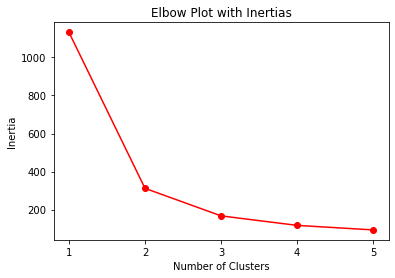

In [35]:
#plot inertias of models
plt.plot(ns, inertias, '-o', c='r')
plt.title('Elbow Plot with Inertias')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ns)
plt.show()

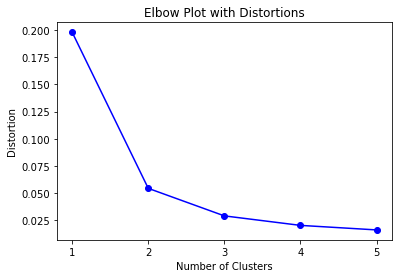

In [36]:
#plot distortions of models
plt.plot(ns, distortions, '-o', c='b')
plt.title('Elbow Plot with Distortions')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(ns)
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(X)
cust_groupby_labels['Labels'] = labels
cust_groupby

,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalPurchases,NoInvoices,Country_enc,CustomerID_enc,Labels
0,74215,1.040000,1,77183.60,1,0,0,0
1,2458,2.644011,12,4310.00,182,15,1,0
2,2341,5.764839,12,1797.24,31,20,2,0
3,631,8.289041,11,1757.55,73,11,3,0
4,197,3.841176,2,334.40,17,5,4,0
...,...,...,...,...,...,...,...,...
5717,2,1.675000,12,3.35,2,0,5717,1
5718,1747,4.320946,12,5699.00,634,0,5718,2
5719,2010,4.175904,12,6756.06,730,0,5719,2
5720,654,6.269661,12,3217.20,59,0,5720,2


In [38]:

ct_totalpurchases = pd.crosstab(cust_groupby_labels['Labels'], cust_groupby_labels['TotalPurchases'])
display(ct_totalpurchases)


TotalPurchases,0.42,0.55,0.65,0.79,0.84,0.85,1.07,1.10,1.25,1.34,...,77183.60,81024.84,91062.38,117379.63,124914.53,140450.72,168472.50,194550.79,259657.30,280206.02
Labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,4,3,1,1,8,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
ct = pd.crosstab(cust_groupby_labels['Labels'], [cust_groupby_labels['TotalPurchases'], cust_groupby_labels['LastPurchaseMonth']])
ct

TotalPurchases    0.42      0.55      0.65      0.79      0.84                \
LastPurchaseMonth        12        10        1         7         1  3  4  7    
Labels                                                                         
0                         0         0         0         0         0  0  0  0   
1                         1         1         1         1         1  1  1  1   
2                         0         0         0         0         0  0  0  0   

TotalPurchases    0.85          ... 77183.60  81024.84  91062.38  117379.63  \
LastPurchaseMonth        2  5   ...        1         12        12        12   
Labels                          ...                                           
0                         0  0  ...         1         1         1         1   
1                         2  1  ...         0         0         0         0   
2                         0  0  ...         0         0         0         0   

TotalPurchases    124914.53 140450.72 168472.50 194550.79 259657.30 280206.02  
LastPurchaseMonth        11        12        12        12        12        12  
Labels                                                                         
0                         1         1         1         1         1         1  
1                         0         0         0         0         0         0  
2                         0         0         0         0         0         0  

[3 rows x 5668 columns]

In [40]:
cust_groupby_norm_df

,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalPurchases,NoInvoices,Country_enc,CustomerID_enc
0,0.693109,0.000010,0.000009,0.720833,0.000009,0.000000,0.000000
1,0.495064,0.000533,0.002417,0.868074,0.036656,0.003021,0.000201
2,0.793131,0.001953,0.004066,0.608905,0.010503,0.006776,0.000678
3,0.337632,0.004435,0.005886,0.940419,0.039060,0.005886,0.001605
4,0.506996,0.009886,0.005147,0.860607,0.043751,0.012868,0.010294
...,...,...,...,...,...,...,...
5717,0.000350,0.000293,0.002099,0.000586,0.000350,0.000000,0.999997
5718,0.210883,0.000522,0.001449,0.687935,0.076531,0.000000,0.690228
5719,0.220727,0.000459,0.001318,0.741912,0.080164,0.000000,0.628028
5720,0.099159,0.000951,0.001819,0.487790,0.008946,0.000000,0.867263


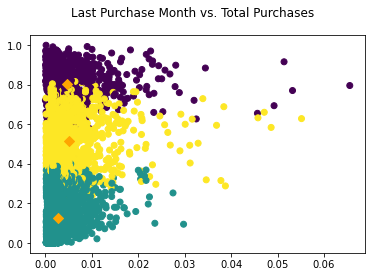

In [41]:
#Last Purchase Month
xs = cust_groupby_norm[:, 2]
#Total Purchases
ys = cust_groupby_norm[:,3]

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,2]
centroids_y = centroids[:,3] 

plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, c='orange')
plt.suptitle('Last Purchase Month vs. Total Purchases')
plt.show()

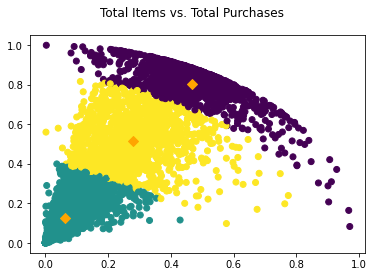

In [42]:
# Total Items
xs = cust_groupby_norm[:,0]
# Total Purchases
ys = cust_groupby_norm[:,3]

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,3] 

plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, c='orange')
plt.suptitle('Total Items vs. Total Purchases')
plt.show()

In [43]:
centroids

array([[4.66054863e-01, 1.92472918e-03, 4.70846567e-03, 8.04936221e-01,
        4.08627513e-02, 2.74448638e-03, 2.70952268e-01],
       [6.36221031e-02, 1.41005695e-03, 2.81833174e-03, 1.27125299e-01,
        1.20082050e-02, 6.92158479e-05, 9.82398077e-01],
       [2.78343527e-01, 2.24429289e-03, 5.07681958e-03, 5.13797366e-01,
        3.70828311e-02, 8.53544359e-04, 7.85680919e-01]])

In [44]:
kmeans.score(X)

-166.56094439562108

##### 5. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [46]:
dendro_labels = cust_groupby['Country_enc'].to_list()

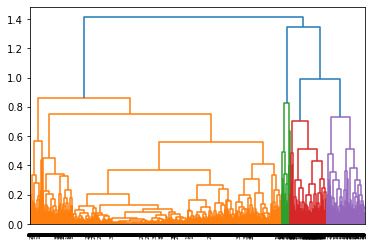

<Figure size 1440x1440 with 0 Axes>

In [47]:
mergings = linkage(cust_groupby_norm, method='complete')
dendrogram(mergings, labels=dendro_labels, leaf_rotation=90, leaf_font_size=6)
plt.figure(figsize=(20,20))
plt.show()

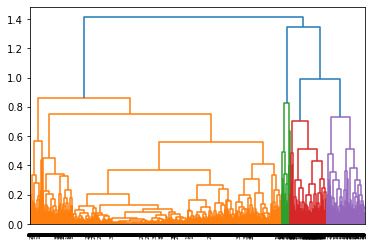

<Figure size 1440x1440 with 0 Axes>

In [48]:
mergings = linkage(cust_groupby_norm, method='complete')
dendrogram(mergings, labels=dendro_labels, leaf_rotation=90, leaf_font_size=6)
plt.figure(figsize=(20,20))
plt.show()

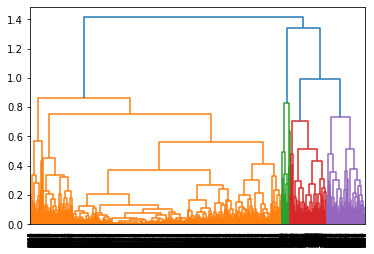

<Figure size 1440x1440 with 0 Axes>

In [49]:
mergings = linkage(cust_groupby_norm, method='complete')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.figure(figsize=(20,20))
plt.show()

##### 6. Compare the results of 4 and 5. Which approach do you think is best? Why?

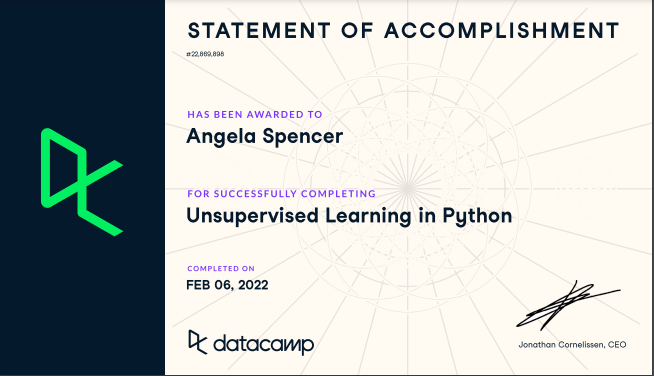